# Methane Freq Results

In [252]:
import re
import pandas as pd
import numpy as np
from pymatgen.core import Molecule
from pymatgen.io.gaussian import GaussianOutput, GaussianInput
import nglview as nv
import matplotlib.pyplot as plt

In [52]:
file = "../stamp.tests/MET_freq/ModesVibrationnels/ModesVibrationnels_statiques.xyz"

tab = {}

freq = re.compile(r"""
            ^nu\[(?P<idf>\d+)/\d/\d+\]=(?P<f>\d+.\d+)
            """, re.X)

coord = re.compile(r"""
            ^(?P<atsb>\w+)\s+
            (?P<x>[+-]?\d+\.\d+)\s+
            (?P<y>[+-]?\d+\.\d+)\s+
            (?P<z>[+-]?\d+\.\d+)\s+
            \w+\s+
            (?P<vx>[+-]?\d+\.\d+)\s+
            (?P<vy>[+-]?\d+\.\d+)\s+
            (?P<vz>[+-]?\d+\.\d+)\s+
            """, re.X)

nfreq = 0
with open(file, "r") as F:
    for line in F:
        array = line.split()
        if len(array) == 1:
            nfreq += 1

        elif freq.match(line):
            m = freq.match(line)
            tab[int(m.groupdict()['idf'])] = dict()
            tab[int(m.groupdict()['idf'])]['freq'] = float(m.groupdict()['f'])
            tab[int(m.groupdict()['idf'])]["coord"] = []
            
        elif coord.match(line):
            m = coord.match(line)
            tab[nfreq]["coord"].append(m.groupdict())

In [53]:
for i in tab:
    coord = pd.DataFrame(tab[i]["coord"])
    coord = coord.astype({
        'x': np.float64,
        'y': np.float64,
        'z': np.float64,
        'vx': np.float64,
        'vy': np.float64,
        'vz': np.float64})
    coord["atsb"] = coord["atsb"].apply(lambda x: x.upper())
    tab[i]["coord"] = coord

In [54]:
tab

{1: {'freq': 2938.35,
  'coord':   atsb         x         y         z        vx        vy        vz
  0    C -6.200000 -6.200000 -6.200000  0.009036  0.188604 -0.272149
  1    H -5.567246 -5.567246 -5.567246  0.059205  0.048456  0.076037
  2    H -6.832754 -6.832754 -5.567246 -0.377250 -0.387999  0.393000
  3    H -5.567246 -6.832754 -6.832754 -0.074779  0.062948  0.090529
  4    H -6.832754 -5.567246 -6.832754  0.361677 -0.373507  0.378508},
 2: {'freq': 2938.35,
  'coord':   atsb         x         y         z        vx        vy        vz
  0    C -6.200000 -6.200000 -6.200000 -0.246375  0.185719  0.120526
  1    H -5.567246 -5.567246 -5.567246 -0.033260 -0.059124 -0.055222
  2    H -6.832754 -6.832754 -5.567246  0.160032  0.134167 -0.152499
  3    H -5.567246 -6.832754 -6.832754  0.457876 -0.454245 -0.450342
  4    H -6.832754 -5.567246 -6.832754  0.264584 -0.260953  0.242622},
 3: {'freq': 2938.35,
  'coord':   atsb         x         y         z        vx        vy        vz
  0   

In [126]:
# For 1 molecule
coords = tab[1]["coord"].loc[:, ["x", "y", "z"]].values
coords

array([[-6.2     , -6.2     , -6.2     ],
       [-5.567246, -5.567246, -5.567246],
       [-6.832754, -6.832754, -5.567246],
       [-5.567246, -6.832754, -6.832754],
       [-6.832754, -5.567246, -6.832754]])

In [127]:
atoms = list(tab[1]["coord"].loc[:, ["atsb"]].values.T[0])
atoms

['C', 'H', 'H', 'H', 'H']

In [128]:
mol = Molecule(atoms, coords)

In [129]:
view = nv.show_pymatgen(mol)

In [130]:
view

NGLWidget()

In [114]:
def show_vectors(nf, tab):
    # For 1 molecule

    print("Frequency {} cm-1".format(tab[nf]["freq"]))

    coords = tab[nf]["coord"].loc[:, ["x", "y", "z"]].values

    atoms = list(tab[nf]["coord"].loc[:, ["atsb"]].values.T[0])

    mol = Molecule(atoms, coords)

    view = nv.show_pymatgen(mol)
    view.update_representation(opacity=0.4)
    for i in tab[nf]["coord"].index:
        po = tab[nf]["coord"].loc[i, ["x", "y", "z"]].values
        pf = po + 2.*tab[nf]["coord"].loc[i, ["vx", "vy", "vz"]].values
        view.shape.add_arrow(po, pf, [0, 0.4, 0.8], 0.2)
    
    return view

In [296]:
view = show_vectors(1, tab)
view

Frequency 2938.35 cm-1


NGLWidget()

In [301]:
view.download_image("nu2938,35.png", factor=8, antialias=True, transparent=True)

In [118]:
show_vectors(2, tab)

Frequency 2938.35 cm-1


NGLWidget()

In [119]:
show_vectors(3, tab)

Frequency 2938.35 cm-1


NGLWidget()

In [120]:
show_vectors(4, tab)

Frequency 2779.37 cm-1


NGLWidget()

In [304]:
view = show_vectors(5, tab)
view

Frequency 1525.49 cm-1


NGLWidget()

In [305]:
view.download_image("nu1525,49.png", factor=8, antialias=True, transparent=True)

In [122]:
show_vectors(6, tab)

Frequency 1525.49 cm-1


NGLWidget()

In [123]:
show_vectors(7, tab)

Frequency 1328.94 cm-1


NGLWidget()

In [124]:
show_vectors(8, tab)

Frequency 1328.94 cm-1


NGLWidget()

In [125]:
show_vectors(9, tab)

Frequency 1328.94 cm-1


NGLWidget()

In [137]:
# Loading IR

IR_nist = np.genfromtxt("74-82-8-IR.jdx", comments='#', skip_header=35, skip_footer=1)

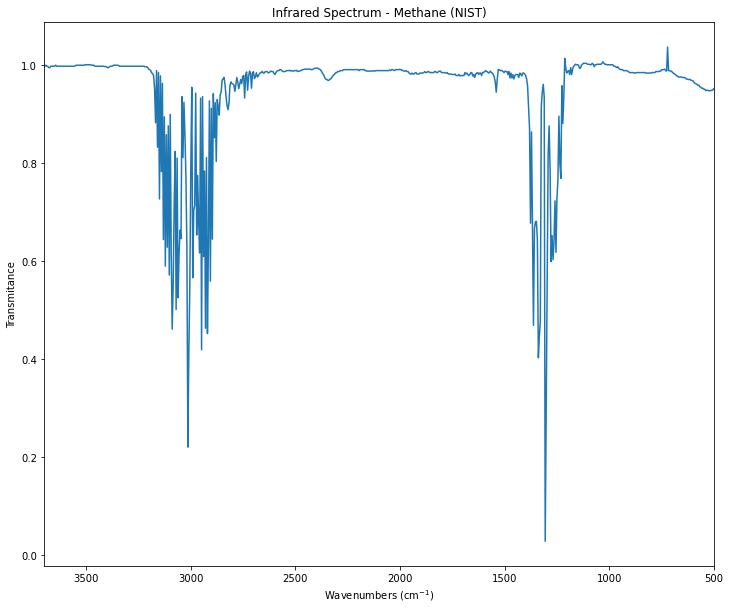

In [148]:
plt.figure(figsize=(12, 10))
plt.plot(IR_nist[:, 0], IR_nist[:, 1])

plt.xlim(3700, 500)

plt.ylabel("Transmitance")
plt.xlabel("Wavenumbers (cm$^{-1}$)")

plt.title("Infrared Spectrum - Methane (NIST)")

plt.show()

In [250]:
# File Gaussian
out = GaussianOutput("../gaussian.test/met_freq/met_resp_freq_opt.out")

In [169]:
GausFreq = []

for i in range(len(out.frequencies[0])):
    GausFreq.append(out.frequencies[0][i]["frequency"])

In [171]:
Gfreq = {}
for i in GausFreq:
    Gfreq[i] = GausFreq.count(i)

In [172]:
Gfreq

{1355.3238: 3, 1581.9661: 2, 3028.0728: 1, 3132.1572: 3}

In [175]:
StampFreq = []
for i in tab:
    StampFreq.append(tab[i]["freq"])

In [176]:
Sfreq = {}
for i in StampFreq:
    Sfreq[i] = StampFreq.count(i)

In [177]:
Sfreq

{2938.35: 3, 2779.37: 1, 1525.49: 2, 1328.94: 3}

In [191]:
sorted(list(Sfreq.keys()))

[1328.94, 1525.49, 2779.37, 2938.35]

In [182]:
Sfreq.values()

dict_values([3, 1, 2, 3])

In [205]:
freqs = np.array([
    sorted(list(Sfreq.keys()), reverse=True),
    sorted(list(Gfreq.keys()), reverse=True),
    ["C-H stretch", "C-H stretch", "H-C-H bending", "H-C-H bending"]
])
freqs

array([['2938.35', '2779.37', '1525.49', '1328.94'],
       ['3132.1572', '3028.0728', '1581.9661', '1355.3238'],
       ['C-H stretch', 'C-H stretch', 'H-C-H bending', 'H-C-H bending']],
      dtype='<U32')

In [206]:
table_freq = pd.DataFrame(
    freqs, index=["Stamp", "Gaussian", "Description"]
)
table_freq

,0,1,2,3
Stamp,2938.35,2779.37,1525.49,1328.94
Gaussian,3132.1572,3028.0728,1581.9661,1355.3238
Description,C-H stretch,C-H stretch,H-C-H bending,H-C-H bending


In [207]:
coords = tab[1]["coord"].loc[:, ["x", "y", "z"]].values
coords

array([[-6.2     , -6.2     , -6.2     ],
       [-5.567246, -5.567246, -5.567246],
       [-6.832754, -6.832754, -5.567246],
       [-5.567246, -6.832754, -6.832754],
       [-6.832754, -5.567246, -6.832754]])

In [208]:
atoms = list(tab[1]["coord"].loc[:, ["atsb"]].values.T[0])
atoms

['C', 'H', 'H', 'H', 'H']

In [209]:
mol = Molecule(atoms, coords)

In [210]:
Molecule?

Init signature:
Molecule(
    species: 'Sequence[SpeciesLike]',
    coords: 'Sequence[ArrayLike]',
    charge: 'float' = 0.0,
    spin_multiplicity: 'int' = None,
    validate_proximity: 'bool' = False,
    site_properties: 'dict' = None,
    charge_spin_check: 'bool' = True,
) -> 'None'
Docstring:     
Mutable Molecule. It has all the methods in IMolecule, but in addition,
it allows a user to perform edits on the molecule.
Init docstring:
Creates a MutableMolecule.

Args:
    species: list of atomic species. Possible kinds of input include a
        list of dict of elements/species and occupancies, a List of
        elements/specie specified as actual Element/Species, Strings
        ("Fe", "Fe2+") or atomic numbers (1,56).
    coords (3x1 array): list of Cartesian coordinates of each species.
    charge (float): Charge for the molecule. Defaults to 0.
    spin_multiplicity (int): Spin multiplicity for molecule.
        Defaults to None, which means that the spin multiplicity is
     

In [226]:
import importlib.util
import networkx as nx

In [215]:
spec = importlib.util.spec_from_file_location("structure", "/home/ovillegas/GITPROYECTS/PhotonasticMat/moltools/structure.py")

In [216]:
stools = importlib.util.module_from_spec(spec)

In [217]:
spec.loader.exec_module(stools)

In [220]:
coords = tab[1]["coord"].loc[:, ["atsb", "x", "y", "z"]]
coords

,atsb,x,y,z
0,C,-6.200000,-6.200000,-6.200000
1,H,-5.567246,-5.567246,-5.567246
2,H,-6.832754,-6.832754,-5.567246
3,H,-5.567246,-6.832754,-6.832754
4,H,-6.832754,-5.567246,-6.832754


In [221]:
connect = stools.connectivity()

In [222]:
connect.get_connectivity(coords)

In [223]:
connect.atoms_map

{0: [1, 2, 3, 4], 1: [0], 2: [0], 3: [0], 4: [0]}

In [233]:
connect.nodes[0]

{'xyz': array([-6.2, -6.2, -6.2], dtype=object), 'atsb': 'C'}

In [225]:
for H in connect[0]:
    print(connect[0][H])

{'dist': 1.0959620766924378}
{'dist': 1.0959620766924378}
{'dist': 1.0959620766924378}
{'dist': 1.0959620766924378}


In [228]:
all_ps = dict(nx.algorithms.all_pairs_shortest_path_length(connect))

all_paths = []

for s in all_ps.keys():
    for e in all_ps[s].keys():
        if all_ps[s][e] == 1:
            all_paths += list(nx.algorithms.all_simple_paths(connect, s, e, cutoff=1))
        elif all_ps[s][e] == 2:
            all_paths += list(nx.algorithms.all_simple_paths(connect, s, e, cutoff=2))
        elif all_ps[s][e] == 3:
            all_paths += list(nx.algorithms.all_simple_paths(connect, s, e, cutoff=3))
                
    
angles_list = [tuple(p) for p in all_paths if len(set(p)) == 3]

In [290]:
for i,j,k in angles_list:
    if i < k:
        print(i, j, k)  # connect.nodes[0]
        vc = connect.nodes[j]["xyz"].astype(np.float64)
        vh1 = connect.nodes[i]["xyz"].astype(np.float64)
        vh2 = connect.nodes[k]["xyz"].astype(np.float64)
    
        vch1 = vh1 - vc
        vch2 = vh2 - vc
    
        print(vch1)
        print(vch2)
    
        vch1_norm = vch1 / np.linalg.norm(vch1)
        vch2_norm = vch2 / np.linalg.norm(vch2)
    
        dot_product = np.dot(vch1_norm, vch2_norm)
        angle = np.arccos(dot_product) * 180 / np.pi
    
        print(angle)
    

1 0 2
[0.632754 0.632754 0.632754]
[-0.632754 -0.632754  0.632754]
109.47122063449069
1 0 3
[0.632754 0.632754 0.632754]
[ 0.632754 -0.632754 -0.632754]
109.47122063449069
1 0 4
[0.632754 0.632754 0.632754]
[-0.632754  0.632754 -0.632754]
109.47122063449069
2 0 3
[-0.632754 -0.632754  0.632754]
[ 0.632754 -0.632754 -0.632754]
109.47122063449069
2 0 4
[-0.632754 -0.632754  0.632754]
[-0.632754  0.632754 -0.632754]
109.47122063449069
3 0 4
[ 0.632754 -0.632754 -0.632754]
[-0.632754  0.632754 -0.632754]
109.47122063449069


In [241]:
mol

Molecule Summary
Site: C (-6.2000, -6.2000, -6.2000)
Site: H (-5.5672, -5.5672, -5.5672)
Site: H (-6.8328, -6.8328, -5.5672)
Site: H (-5.5672, -6.8328, -6.8328)
Site: H (-6.8328, -5.5672, -6.8328)

In [259]:
molG = out.opt_structures[0]

In [260]:
molG.cart_coords

array([[ 0.     ,  0.     ,  0.     ],
       [ 0.62565,  0.62565,  0.62565],
       [-0.62565, -0.62565,  0.62565],
       [ 0.62565, -0.62565, -0.62565],
       [-0.62565,  0.62565, -0.62565]])

In [264]:
molG.distance_matrix

array([[0.        , 1.08365759, 1.08365759, 1.08365759, 1.08365759],
       [1.08365759, 0.        , 1.76960543, 1.76960543, 1.76960543],
       [1.08365759, 1.76960543, 0.        , 1.76960543, 1.76960543],
       [1.08365759, 1.76960543, 1.76960543, 0.        , 1.76960543],
       [1.08365759, 1.76960543, 1.76960543, 1.76960543, 0.        ]])

In [265]:
mol.distance_matrix

array([[0.        , 1.09596208, 1.09596208, 1.09596208, 1.09596208],
       [1.09596208, 0.        , 1.78969858, 1.78969858, 1.78969858],
       [1.09596208, 1.78969858, 0.        , 1.78969858, 1.78969858],
       [1.09596208, 1.78969858, 1.78969858, 0.        , 1.78969858],
       [1.09596208, 1.78969858, 1.78969858, 1.78969858, 0.        ]])

In [274]:
import itertools as it

In [281]:
molG.indices_from_symbol("C")

(0,)

In [282]:
molG.indices_from_symbol("H")

(1, 2, 3, 4)

In [286]:
for i,j in it.product(molG.indices_from_symbol("C"), molG.indices_from_symbol("H")):
    print(i, j)
    print(molG.get_distance(i, j))

0 1
1.0836575877554682
0 2
1.0836575877554682
0 3
1.0836575877554682
0 4
1.0836575877554682


In [293]:
for i,j in it.product(mol.indices_from_symbol("C"), mol.indices_from_symbol("H")):
    print(i, j)
    print(mol.get_distance(i, j))

0 1
1.0959620766924378
0 2
1.0959620766924378
0 3
1.0959620766924378
0 4
1.0959620766924378


In [291]:
for i,j,k in it.product(molG.indices_from_symbol("H"), molG.indices_from_symbol("C"), molG.indices_from_symbol("H")):
    if i != k and i < k:
        print(i, j, k)
        print(molG.get_angle(i, j, k))

1 0 2
109.47122063449069
1 0 3
109.47122063449069
1 0 4
109.47122063449069
2 0 3
109.47122063449069
2 0 4
109.47122063449069
3 0 4
109.47122063449069


In [292]:
for i,j,k in it.product(mol.indices_from_symbol("H"), mol.indices_from_symbol("C"), mol.indices_from_symbol("H")):
    if i != k and i < k:
        print(i, j, k)
        print(mol.get_angle(i, j, k))

1 0 2
109.47122063449069
1 0 3
109.47122063449069
1 0 4
109.47122063449069
2 0 3
109.47122063449069
2 0 4
109.47122063449069
3 0 4
109.47122063449069


In [294]:
table_geom = pd.DataFrame({
    "rCH (angs)": [1.096, 1.083, 1.087],
    "aHCH (degrees)": [109.471, 109.471, 109.471]
}, index=["Stamp", "Gaussian", "NIST"])
table_geom

,rCH (angs),aHCH (degrees)
Stamp,1.096,109.471
Gaussian,1.083,109.471
NIST,1.087,109.471


In [306]:
table_freq.to_html("table_freq.html")

In [307]:
table_geom.to_html("table_geom.html")